In [ ]:
import tensorflow as tf
!pip install kaggle
api_token = {"username":"your-username","key":"youre-api-key"}
import os


In [ ]:
path='/root/.kaggle/'
file='kaggle.json'
if not (os.path.exists(path)):
  os.mkdir(path)
if not (os.path.exists('/root/.kaggle/kaggle.json')):
  with open(os.path.join(path, file), 'w+') as fp:
    print(fp) 
  !echo '{"username":"your-username","key":"youre-api-key"}' > /root/.kaggle/kaggle.json
  ! chmod 600 ~/.kaggle/kaggle.json


<_io.TextIOWrapper name='/root/.kaggle/kaggle.json' mode='w+' encoding='UTF-8'>


In [ ]:
! kaggle datasets download -d amandalk/sp-air-quality

 24% 5.00M/21.0M [00:00<00:00, 48.9MB/s]
100% 21.0M/21.0M [00:00<00:00, 103MB/s] 


In [ ]:
!unzip /content/sp-air-quality.zip

Archive:  /content/sp-air-quality.zip
  inflating: sp_air_quality.csv      


In [ ]:
import pandas as pd
df = pd.read_csv(f'sp_air_quality.csv',)
df

,Datetime,Station,Benzene,CO,PM10,PM2.5,NO2,O3,SO2,Toluene,TRS
0,2013-05-08 01:00:00,Araçatuba,NaN,NaN,30.0,NaN,NaN,7.0,NaN,NaN,NaN
1,2013-05-08 02:00:00,Araçatuba,NaN,NaN,30.0,NaN,NaN,6.0,NaN,NaN,NaN
2,2013-05-08 03:00:00,Araçatuba,NaN,NaN,31.0,NaN,NaN,6.0,NaN,NaN,NaN
3,2013-05-08 04:00:00,Araçatuba,NaN,NaN,31.0,NaN,NaN,4.0,NaN,NaN,NaN
4,2013-05-08 05:00:00,Araçatuba,NaN,NaN,32.0,NaN,NaN,4.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3445255,2020-09-09 20:00:00,Taubaté,NaN,NaN,32.0,38.0,4.0,51.0,NaN,NaN,NaN
3445256,2020-09-09 21:00:00,Taubaté,NaN,NaN,32.0,38.0,3.0,40.0,NaN,NaN,NaN
3445257,2020-09-09 22:00:00,Taubaté,NaN,NaN,32.0,38.0,4.0,35.0,NaN,NaN,NaN
3445258,2020-09-09 23:00:00,Taubaté,NaN,NaN,33.0,38.0,6.0,30.0,NaN,NaN,NaN


In [ ]:

df = df[['Datetime',	'CO',	'PM10',	'PM2.5'	,'NO2',	'O3']].dropna()
df['Datetime']=pd.to_datetime(df['Datetime'], errors = 'coerce')

df.tail()

,Datetime,CO,PM10,PM2.5,NO2,O3
3445136,2020-09-09 20:00:00,2.0,31.0,39.0,5.0,25.0
3445137,2020-09-09 21:00:00,2.0,31.0,39.0,6.0,21.0
3445138,2020-09-09 22:00:00,2.0,32.0,39.0,6.0,16.0
3445139,2020-09-09 23:00:00,2.0,32.0,42.0,5.0,13.0
3445140,2020-09-09 00:00:00,2.0,33.0,43.0,5.0,12.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169612 entries, 373361 to 3445140
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   Datetime  169612 non-null  datetime64[ns]
 1   CO        169612 non-null  float64       
 2   PM10      169612 non-null  float64       
 3   PM2.5     169612 non-null  float64       
 4   NO2       169612 non-null  float64       
 5   O3        169612 non-null  float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 9.1 MB


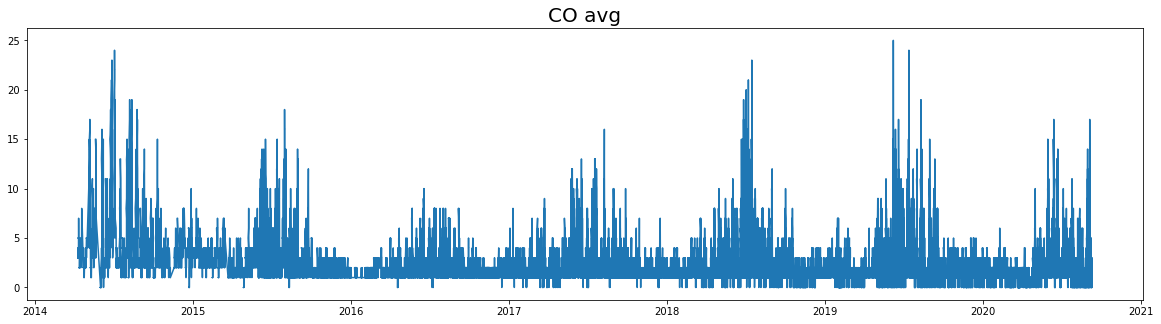

In [ ]:
import matplotlib.pyplot as plt
 
plt.figure(figsize=(20,5))
plt.plot(df['Datetime'],df['CO'],scalex=True)
plt.title( 'CO avg',
          fontsize=20);

In [ ]:
df.describe()

,CO,PM10,PM2.5,NO2,O3
count,169612.000000,169612.000000,169612.000000,169612.000000,169612.000000
mean,1.973905,21.734294,24.423643,5.178637,15.617621
std,1.562404,13.356113,15.041473,4.112909,10.795909
min,0.000000,2.000000,1.000000,0.000000,0.000000
25%,1.000000,13.000000,14.000000,2.000000,8.000000
50%,2.000000,18.000000,20.000000,4.000000,14.000000
75%,2.000000,27.000000,31.000000,7.000000,21.000000
max,25.000000,168.000000,196.000000,86.000000,163.000000


In [ ]:
train_percent=0.8
past=30
future=7
learning_rate = 0.001
batch_size = 256
epochs = 100
train_split=int(train_percent * int(df.shape[0]))

def normalize(data, train_split):
    data_mean = data[:train_split].mean(axis=0)
    data_std = data[:train_split].std(axis=0)
    return (data - data_mean) / data_std

In [ ]:
features=df[[	'CO',	'PM10',	'PM2.5'	,'NO2',	'O3']]
features.index=df['Datetime']
features

,CO,PM10,PM2.5,NO2,O3
Datetime,,,,,
2014-04-10 10:00:00,3.0,25.0,27.0,11.0,4.0
2014-04-10 11:00:00,3.0,24.0,25.0,13.0,5.0
2014-04-10 12:00:00,4.0,23.0,25.0,16.0,6.0
2014-04-10 13:00:00,4.0,23.0,25.0,16.0,8.0
2014-04-10 14:00:00,4.0,23.0,24.0,10.0,10.0
...,...,...,...,...,...
2020-09-09 20:00:00,2.0,31.0,39.0,5.0,25.0
2020-09-09 21:00:00,2.0,31.0,39.0,6.0,21.0
2020-09-09 22:00:00,2.0,32.0,39.0,6.0,16.0


In [ ]:
features_data=normalize(features.values,train_split)
features_data = pd.DataFrame(features_data)
train_data = features_data.loc[0 : train_split - 1]
val_data = features_data.loc[train_split:]
features_data

,0,1,2,3,4
0,0.585281,0.195284,0.134230,1.336405,-1.038662
1,0.585281,0.123629,0.005570,1.808050,-0.947048
2,1.202422,0.051973,0.005570,2.515519,-0.855433
3,1.202422,0.051973,0.005570,2.515519,-0.672204
4,1.202422,0.051973,-0.058760,1.100582,-0.488974
...,...,...,...,...,...
169607,-0.031860,0.625218,0.906188,-0.078532,0.885246
169608,-0.031860,0.625218,0.906188,0.157291,0.518787
169609,-0.031860,0.696874,0.906188,0.157291,0.060714
169610,-0.031860,0.696874,1.099177,-0.078532,-0.214130


In [ ]:
start = past + future
end = start + train_split

x_train = train_data[[0]].values
y_train = features_data.iloc[start:end][[0]]

sequence_length = int(past)
sequence_length

30

In [ ]:
dataset_train = tf.keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=1,
    batch_size=batch_size,
)

In [ ]:
x_end = len(val_data) - past - future

label_start = train_split + past + future

x_val = val_data.iloc[:x_end][[0]].values
y_val = features_data.iloc[label_start:][[0]]

dataset_val = tf.keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=1,
    batch_size=batch_size,
)


for batch in dataset_train.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

Input shape: (256, 30, 1)
Target shape: (256, 1)


In [ ]:

model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2])),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.LSTM(64),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(32, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),loss=tf.keras.losses.mean_absolute_error, metrics=["mae"])
path_checkpoint = "model_checkpoint.h5"
es_callback = tf.keras.callbacks.EarlyStopping(monitor="mae", min_delta=0, patience=5)

modelckpt_callback = tf.keras.callbacks.ModelCheckpoint(
    monitor="loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)


In [ ]:

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)

Epoch 1/100
530/530 [==============================] - 40s 69ms/step - loss: 0.5997 - mae: 0.5997 - val_loss: 0.4222 - val_mae: 0.4222

Epoch 00001: loss improved from inf to 0.50331, saving model to model_checkpoint.h5
Epoch 2/100
530/530 [==============================] - 35s 66ms/step - loss: 0.5832 - mae: 0.5832 - val_loss: 0.4156 - val_mae: 0.4156

Epoch 00002: loss improved from 0.50331 to 0.48545, saving model to model_checkpoint.h5
Epoch 3/100
530/530 [==============================] - 37s 69ms/step - loss: 0.5714 - mae: 0.5714 - val_loss: 0.4097 - val_mae: 0.4097

Epoch 00003: loss improved from 0.48545 to 0.47675, saving model to model_checkpoint.h5
Epoch 4/100
530/530 [==============================] - 36s 68ms/step - loss: 0.5591 - mae: 0.5591 - val_loss: 0.4102 - val_mae: 0.4102

Epoch 00004: loss improved from 0.47675 to 0.46998, saving model to model_checkpoint.h5
Epoch 5/100
530/530 [==============================] - 36s 68ms/step - loss: 0.5547 - mae: 0.5547 - val_loss

In [ ]:
history.history['mae']

[0.5033122897148132,
 0.4854493737220764,
 0.47675251960754395,
 0.46998417377471924,
 0.4659750759601593,
 0.4616355299949646,
 0.46142491698265076,
 0.4568350911140442,
 0.45278558135032654,
 0.45108333230018616,
 0.4511188864707947,
 0.45020318031311035,
 0.4510290324687958,
 0.44747573137283325,
 0.4458919167518616,
 0.44561004638671875,
 0.4454590678215027,
 0.44370776414871216,
 0.4435420632362366,
 0.44172579050064087,
 0.4427432417869568,
 0.44167426228523254,
 0.4396277070045471,
 0.4399080276489258,
 0.4391557574272156,
 0.43735429644584656,
 0.43893006443977356,
 0.4373299181461334,
 0.4359744191169739,
 0.43506956100463867,
 0.4348789155483246,
 0.43504711985588074,
 0.4330283999443054,
 0.4336055815219879,
 0.4320361018180847,
 0.42968985438346863,
 0.43173545598983765,
 0.4307292699813843,
 0.4290403425693512,
 0.4283779263496399,
 0.4296565353870392,
 0.42823418974876404,
 0.42785146832466125,
 0.4266941249370575,
 0.4263823926448822,
 0.42514851689338684,
 0.42491135001

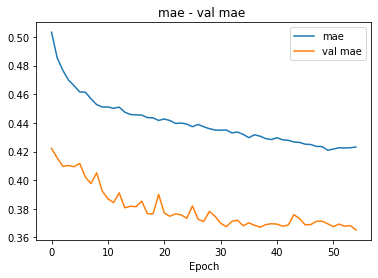

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('mae - val mae ')
plt.xlabel('Epoch')
plt.legend(['mae','val mae'], loc='best')
plt.show()

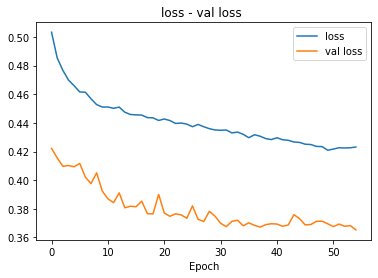

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss - val loss ')
plt.xlabel('Epoch')
plt.legend(['loss','val loss'], loc='best')
plt.show()